In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import necessary libraries
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.prefilter import PrefilterChecker


In [3]:
def load_and_concatenate_data(folder_path):
  csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
  dfs = []
  for file in csv_files:
    df = pd.read_csv(file)
    category = os.path.splitext(os.path.basename(file))[0]
    df['product_category'] = category
    cols = ['product_category'] + [col for col in df.columns if col != 'product_category']
    df = df[cols]
    dfs.append(df)

  combined_df = pd.concat(dfs, ignore_index=True)
  return combined_df

men_folder_path = '/content/drive/MyDrive/Men'
women_folder_path = '/content/drive/MyDrive/Women'

men_combined_df = load_and_concatenate_data(men_folder_path)
women_Combined_df = load_and_concatenate_data(women_folder_path)


This code reads product data from multiple CSV files, assigns a product category to each dataset, and combines them into a single DataFrame for analysis.

In [4]:
men_combined_df

,product_category,Unnamed: 0,product_name,link,product_images,price,details
0,LINEN,0,100% LINEN SHIRT,https://www.zara.com/in/en/100-linen-shirt-p06...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,990.00",Regular-fit shirt made of lightweight linen fa...
1,LINEN,5,VISCOSE/LINEN BLEND SHIRT,https://www.zara.com/in/en/viscose-linen-blend...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,290.00",Relaxed fit shirt in a linen and viscose blend...
2,LINEN,7,FLORAL PRINT SHIRT,https://www.zara.com/in/en/floral-print-shirt-...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,290.00","Relaxed fit shirt with a camp collar, short sl..."
3,LINEN,9,VISCOSE - LINEN SHIRT,https://www.zara.com/in/en/viscose---linen-shi...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,290.00",Relaxed fit shirt made of a viscose and cotton...
4,LINEN,10,PLEATED TROUSERS,https://www.zara.com/in/en/pleated-trousers-p0...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 4,990.00",Straight fit trousers. Waist with front pleate...
...,...,...,...,...,...,...,...
1473,SWEATERS_CARDIGANS,206,TEXTURED KNIT VEST,https://www.zara.com/in/en/textured-knit-vest-...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,290.00",Knit sleeveless vest made of a spun cotton ble...
1474,SWEATERS_CARDIGANS,208,TEXTURED KNIT VEST,https://www.zara.com/in/en/textured-knit-vest-...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,290.00",Knit V-neck vest made of spun cotton fabric. R...
1475,SWEATERS_CARDIGANS,211,KNIT TANK TOP,https://www.zara.com/in/en/knit-tank-top-p0359...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 2,990.00",Sleeveless knit top. Wide round neck. Contrast...
1476,SWEATERS_CARDIGANS,213,GEOMETRIC JACQUARD KNIT VEST,https://www.zara.com/in/en/geometric-jacquard-...,[{'https://static.zara.net/photos///2023/I/0/2...,"₹ 3,290.00",Vest made of a cotton blend. V-neck. Ribbed tr...


In [5]:
men_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478 entries, 0 to 1477
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_category  1478 non-null   object
 1   Unnamed: 0        1478 non-null   int64 
 2   product_name      1476 non-null   object
 3   link              1478 non-null   object
 4    product_images   1478 non-null   object
 5   price             1476 non-null   object
 6   details           1475 non-null   object
dtypes: int64(1), object(6)
memory usage: 81.0+ KB


In [6]:
men_combined_df.isnull().sum()

product_category    0
Unnamed: 0          0
product_name        2
link                0
 product_images     0
price               2
details             3
dtype: int64

There are three columns with missing values, let's fill these missing values

In [7]:
# Removing the Rupee sign and any other non-numeric characters from the 'price' column
men_combined_df['price'] = men_combined_df['price'].str.replace('₹', '').str.replace(',', '')

# Converting the 'price' column to numeric, coercing any non-numeric values to NaN
men_combined_df['price'] = pd.to_numeric(men_combined_df['price'], errors='coerce')


In [8]:
# Filling the missing values
mean_price = men_combined_df['price'].mean()
men_combined_df['price'].fillna(mean_price, inplace=True)


In [9]:
men_combined_df['product_name'].fillna(method='ffill', inplace=True)  # Forward fill for 'product_name'


In [10]:
mode_details = men_combined_df['details'].mode()[0]  # Get the mode (most frequent value)
men_combined_df['details'].fillna(mode_details, inplace=True)

In [11]:
# dropping the unecessary columns from men's data or the columns which are not useful
men_data = men_combined_df.copy()
men_data = men_data.drop(columns=['Unnamed: 0', 'link', ' product_images'])
men_data

,product_category,product_name,price,details
0,LINEN,100% LINEN SHIRT,3990.0,Regular-fit shirt made of lightweight linen fa...
1,LINEN,VISCOSE/LINEN BLEND SHIRT,3290.0,Relaxed fit shirt in a linen and viscose blend...
2,LINEN,FLORAL PRINT SHIRT,3290.0,"Relaxed fit shirt with a camp collar, short sl..."
3,LINEN,VISCOSE - LINEN SHIRT,3290.0,Relaxed fit shirt made of a viscose and cotton...
4,LINEN,PLEATED TROUSERS,4990.0,Straight fit trousers. Waist with front pleate...
...,...,...,...,...
1473,SWEATERS_CARDIGANS,TEXTURED KNIT VEST,3290.0,Knit sleeveless vest made of a spun cotton ble...
1474,SWEATERS_CARDIGANS,TEXTURED KNIT VEST,3290.0,Knit V-neck vest made of spun cotton fabric. R...
1475,SWEATERS_CARDIGANS,KNIT TANK TOP,2990.0,Sleeveless knit top. Wide round neck. Contrast...
1476,SWEATERS_CARDIGANS,GEOMETRIC JACQUARD KNIT VEST,3290.0,Vest made of a cotton blend. V-neck. Ribbed tr...


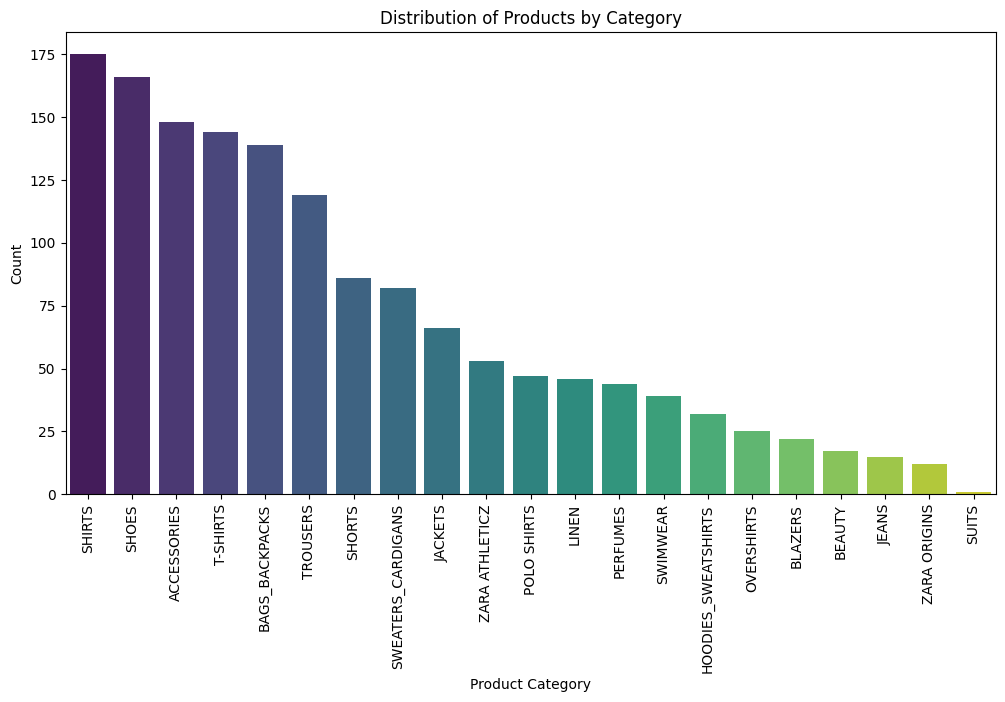

In [12]:
# Count the number of products in each category
category_counts = men_data['product_category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Products by Category')
plt.show()

There are 21 categories in product. Shirts are available in higher range followed by Shoes, Accessories, etc.


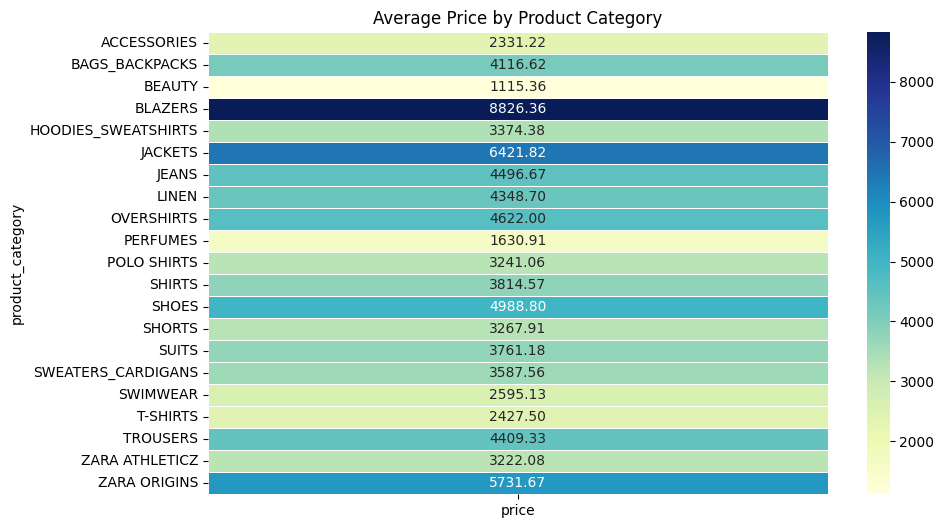

In [13]:
# Create a pivot table to analyze relationships between product categories and prices
pivot_table = men_data.pivot_table(index='product_category', values='price', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price by Product Category')
plt.show()


Average price of each product_category is shown in the graph above.

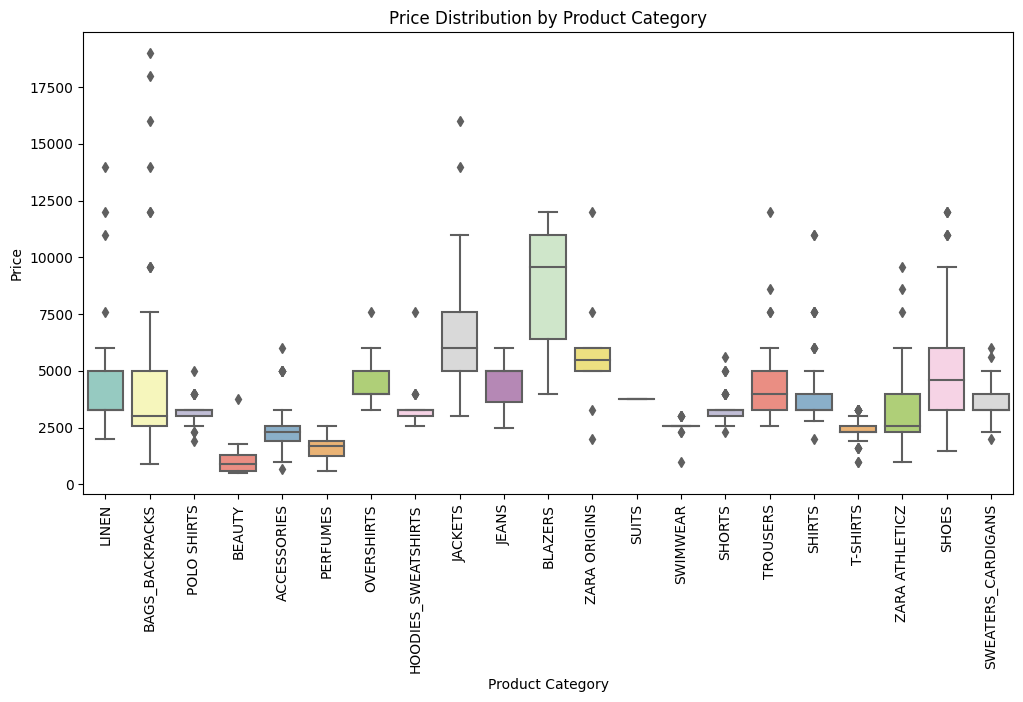

In [14]:
# Create a box plot or violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='price', data=men_data, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Distribution by Product Category')
plt.show()


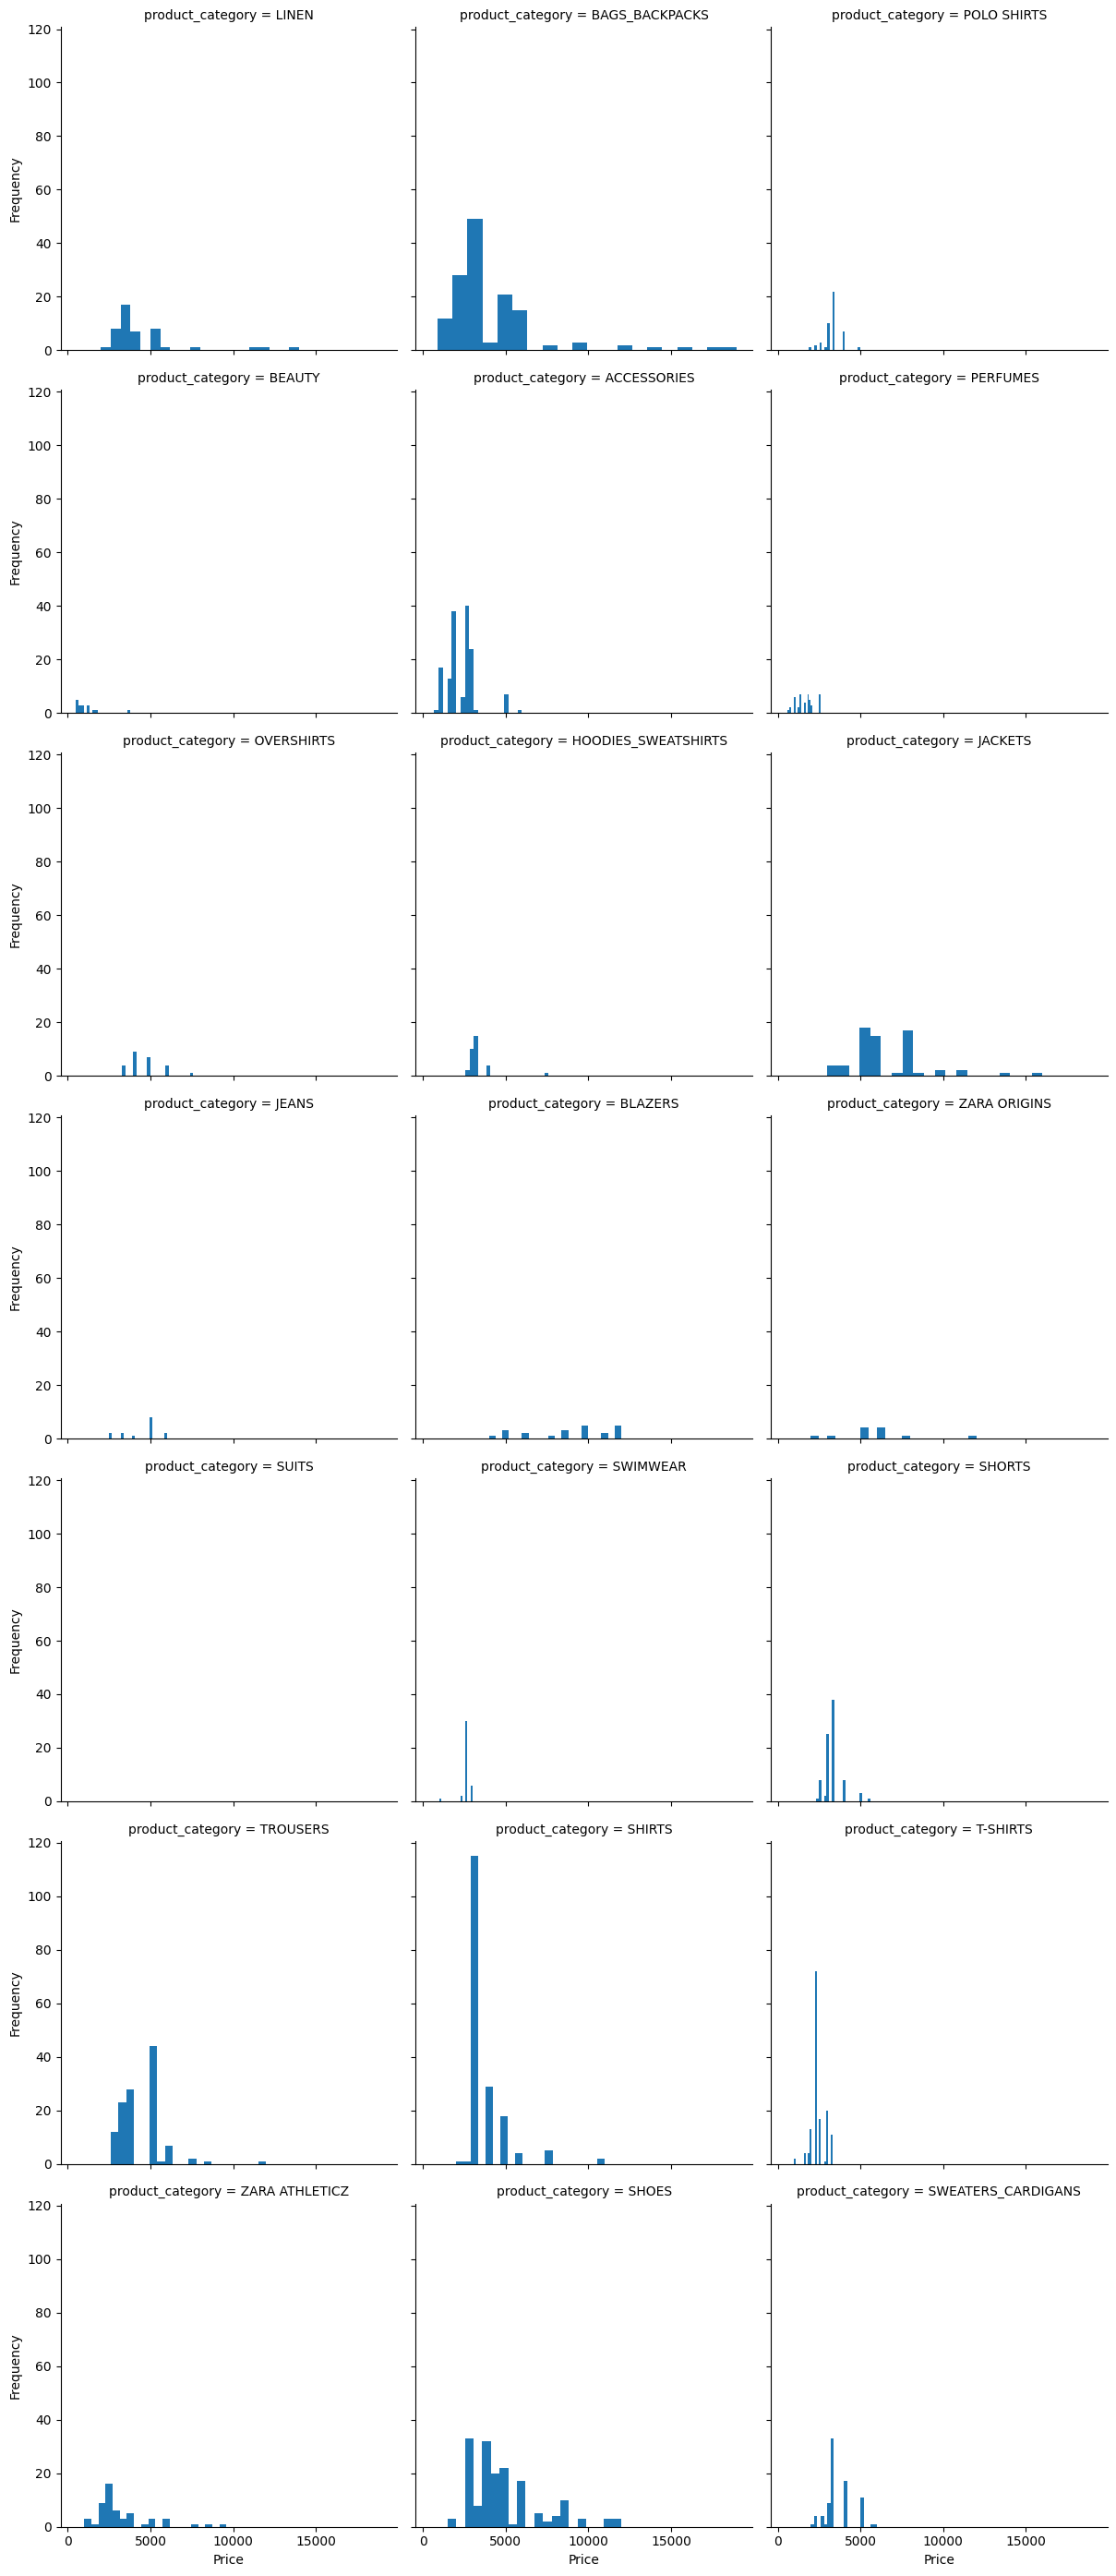

In [15]:
# Create histograms for prices by product category
g = sns.FacetGrid(men_data, col='product_category', col_wrap=3, height=4, margin_titles=True)
g.map(plt.hist, 'price', bins=20)
g.set_axis_labels('Price', 'Frequency')
plt.show()


Price Distribution Across Product Categories: This series of histograms displays the distribution of product prices within various product categories. Each histogram represents a specific category, with prices on the x-axis and the frequency of products at different price points on the y-axis. The histograms allow us to observe how prices are distributed within each category, providing valuable insights into the pricing strategies and price ranges for different types of products.

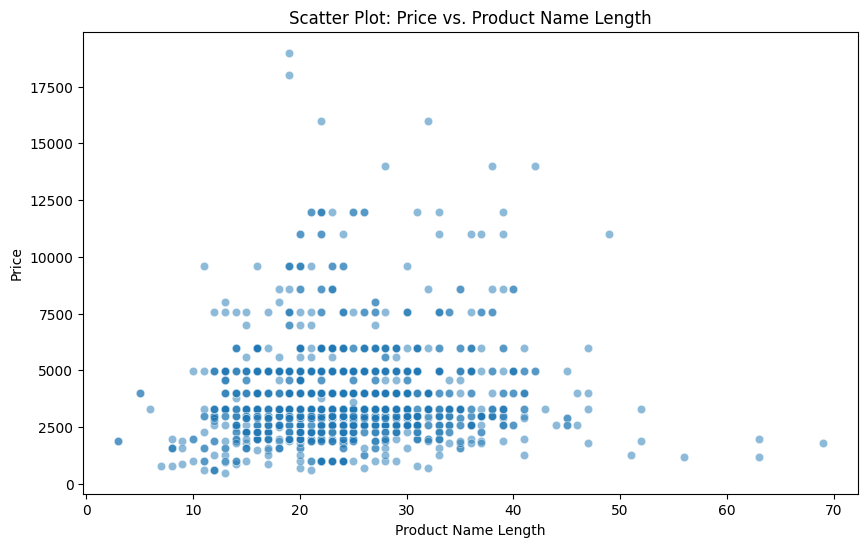

In [16]:
# A scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=men_data['product_name'].str.len(), y='price', data=men_data, alpha=0.5)
plt.xlabel('Product Name Length')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs. Product Name Length')
plt.show()


This scatter plot illustrates the potential relationship between the length of product names and their corresponding prices. Each data point represents a product, with the x-axis indicating the length of the product name (in characters) and the y-axis representing the price. The scatter plot allows us to explore whether there is any discernible pattern or correlation between the complexity or length of product names and their pricing, providing insights into how product naming may impact pricing decisions.

In [17]:
beauty_products = men_data[men_data['product_category'] == 'BEAUTY']
beauty_products

,product_category,product_name,price,details
232,BEAUTY,ULTIMATTE MATTE LIQUID LIPSTICK,790.000000,"Slick with it. Our favourite lipstick, now in ..."
233,BEAUTY,BRONZING POWDER,1790.000000,This velvety powder gives skin an instant boos...
234,BEAUTY,3-IN-1 BAR REFILL,1290.000000,"Creamy texture multifunction makeup bar, avail..."
235,BEAUTY,CONCEALER,890.000000,"A creamy, luscious formula that is easy to ble..."
236,BEAUTY,LIP OIL,790.000000,This creamy lip oil glides like silk to achiev...
237,BEAUTY,EYELINER,790.000000,This eyeliner with an ultra-thin and intensely...
238,BEAUTY,EYELASH CURLER,890.000000,Allows the eyelashes to be curled and raised i...
239,BEAUTY,EYELASH CURLER,3761.178862,Jacket made of a very lightweight and reflecti...
240,BEAUTY,NAIL SET,1590.000000,Set of nail art brushes. It is composed of thr...
241,BEAUTY,TOP COAT NAIL VARNISH,590.000000,Quick-drying top coat that highlights the colo...


In [18]:
men_data['price'].value_counts()

3290.000000     291
4990.000000     172
3990.000000     154
2990.000000     153
2590.000000     148
2290.000000      99
5990.000000      72
2890.000000      60
1990.000000      52
7590.000000      34
990.000000       32
1890.000000      30
1590.000000      27
4590.000000      27
8590.000000      16
9590.000000      14
11990.000000     13
1790.000000      12
1290.000000      10
10990.000000     10
5590.000000       8
6990.000000       6
590.000000        5
7990.000000       4
690.000000        3
890.000000        3
790.000000        3
13990.000000      3
3761.178862       2
15990.000000      2
1190.000000       2
1490.000000       2
2490.000000       2
2790.000000       2
18990.000000      1
950.000000        1
490.000000        1
17990.000000      1
3590.000000       1
Name: price, dtype: int64

In [19]:
# Feature engineering for Price
men_data['log_price'] = men_data['price'].apply(lambda x: np.log(x))
men_data['price_category'] = pd.cut(men_data['price'], bins=[0, 1000, 2000, 3000, float('inf')], labels=['low', 'medium', 'high', 'very_high'])

In [20]:
men_data.head()

,product_category,product_name,price,details,log_price,price_category
0,LINEN,100% LINEN SHIRT,3990.0,Regular-fit shirt made of lightweight linen fa...,8.291547,very_high
1,LINEN,VISCOSE/LINEN BLEND SHIRT,3290.0,Relaxed fit shirt in a linen and viscose blend...,8.098643,very_high
2,LINEN,FLORAL PRINT SHIRT,3290.0,"Relaxed fit shirt with a camp collar, short sl...",8.098643,very_high
3,LINEN,VISCOSE - LINEN SHIRT,3290.0,Relaxed fit shirt made of a viscose and cotton...,8.098643,very_high
4,LINEN,PLEATED TROUSERS,4990.0,Straight fit trousers. Waist with front pleate...,8.515191,very_high


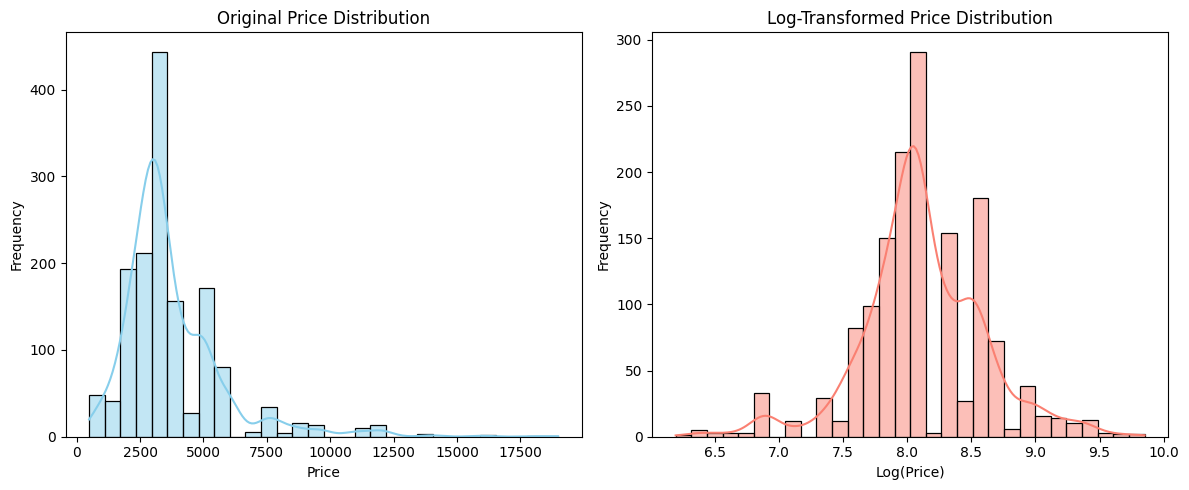

In [21]:

# Set up the figure and subplots
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

# Original Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(men_data['price'], bins=30, kde=True, color='skyblue')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Log-Transformed Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(men_data['log_price'], bins=30, kde=True, color='salmon')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Price Distribution Analysis: This set of subplots provides insights into the distribution of product prices in the men's category.

Left Subplot - Original Price Distribution:
The left subplot displays the original distribution of product prices. It shows the frequency of products at different price points, with a density curve overlaid for a smooth representation of the distribution. This histogram allows us to understand the distribution of prices in their original scale.

Right Subplot - Log-Transformed Price Distribution:
The right subplot illustrates the distribution of log-transformed prices. The logarithmic transformation is applied to the prices, resulting in a more symmetrical distribution. The density curve shows how prices are distributed when transformed using the logarithmic function.

By comparing these two subplots, we gain insights into the original and log-transformed price distributions, which can be useful for understanding price trends and conducting statistical analyses.

We calculate the counts of products in each price category using the value_counts() function.

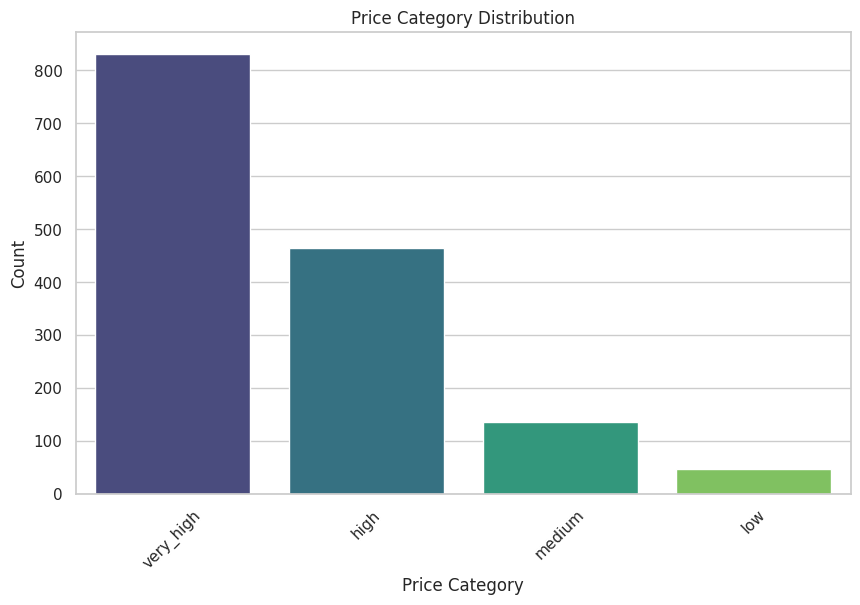

In [22]:

# Count the number of products in each price category
price_category_counts = men_data['price_category'].value_counts()

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar chart or countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=men_data, x='price_category', order=price_category_counts.index, palette='viridis')
plt.title('Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

plt.show()


The visualization represents the distribution of products across different price categories. Each bar in the chart corresponds to a price category ('low', 'medium', 'high', 'very_high'), and the height of the bar indicates the count of products within that category. This visualization helps us quickly understand how products are distributed across price ranges in the men's category.

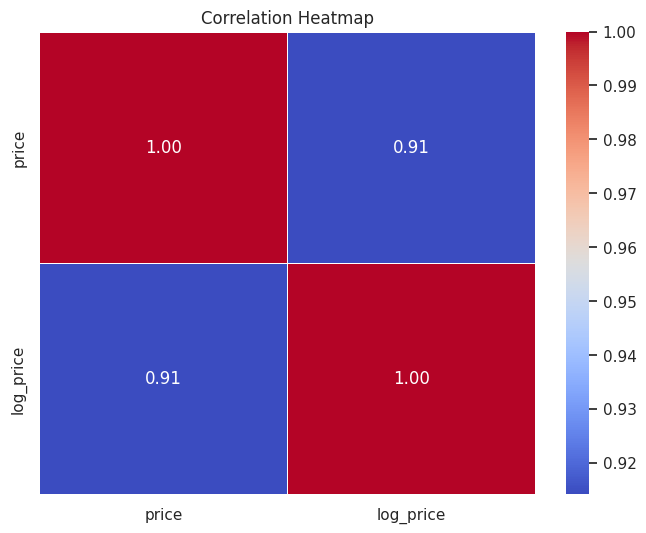

In [23]:
# Calculate the correlation matrix
correlation_matrix = men_data[['price', 'log_price']].corr()

# Set up the figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap illustrates the correlation coefficients between two variables: 'price' and 'log_price.'

The correlation coefficient between 'price' and itself is 1.00, indicating a perfect positive correlation.
The correlation coefficient between 'log_price' and itself is 1.00 as well, demonstrating a perfect positive correlation.
Specifically:

The correlation coefficient between 'price' and 'log_price' is approximately 0.91, signifying a strong positive correlation.

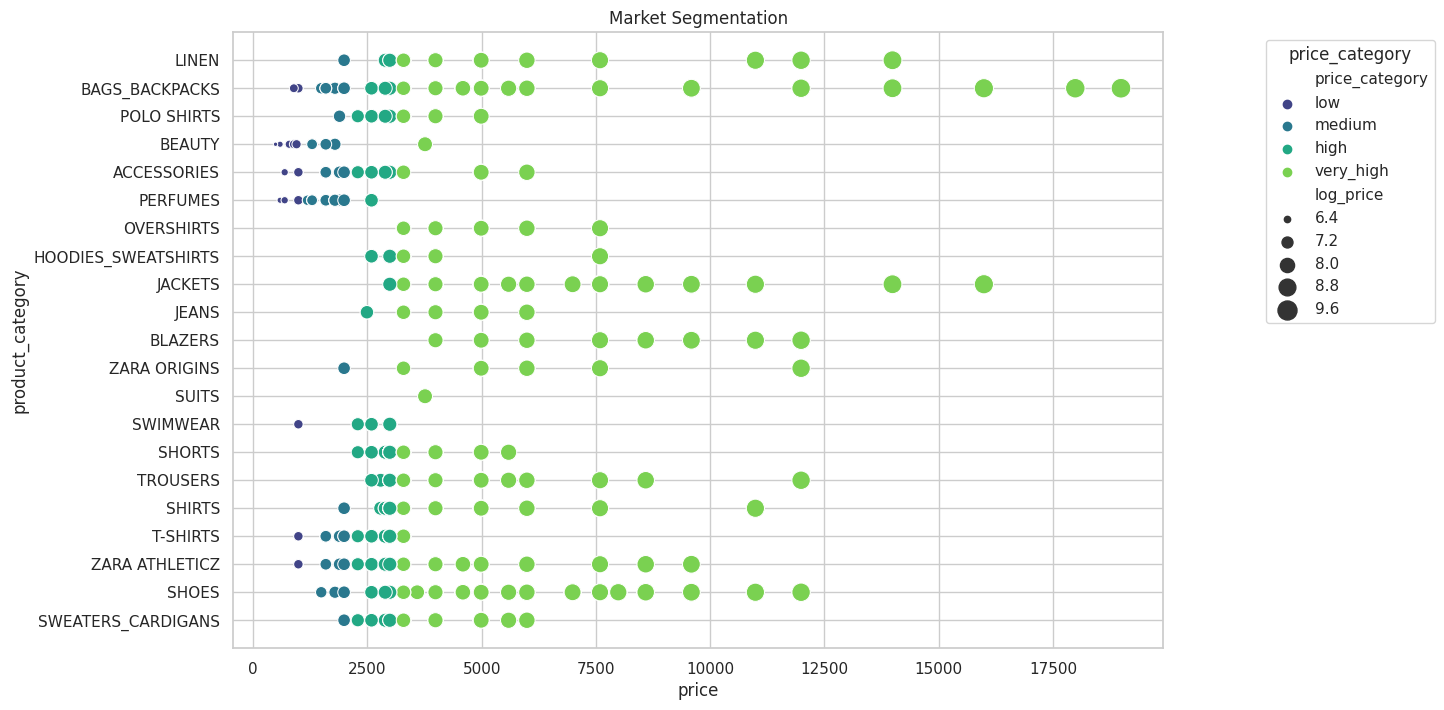

In [24]:
# Define the features for market segmentation
Price = 'price'  # The feature for x-axis
product_category = 'product_category'   # The feature for y-axis
log_price = 'log_price'  # The feature for bubble size
price_category = 'price_category'  # the feature for bubble color

# Create a scatter plot with bubble size and color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=men_data, x= Price , y=product_category, size=log_price, hue=price_category, palette='viridis', sizes=(10, 200))

# Labels and a legend
plt.title('Market Segmentation')
plt.xlabel(Price)
plt.ylabel(product_category)
plt.legend(title=price_category, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()


X-Axis (Price): The x-axis represents the product price, allowing us to analyze how prices are distributed across different product categories.

Y-Axis (Product Category): The y-axis displays product categories, helping us understand which categories products belong to.

Bubble Size (Log-Transformed Price): The size of each bubble indicates the log-transformed price of a product. Larger bubbles represent higher log-transformed prices, while smaller bubbles represent lower log-transformed prices.

Bubble Color (Price Category): The color of each bubble corresponds to its price category. Different colors represent different price categories, helping us segment products based on their price ranges.

In [25]:
men_data['price_percentile_rank'] = men_data.groupby('product_category')['price'].rank(pct=True)


A density plot using sns.kdeplot() to visualize the distribution of price percentile ranks ('price_percentile_rank') within categories. A a density plot that shows how price percentile ranks are distributed within different product categories

<ipython-input-26-0a595ba70520>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=men_data, x='price_percentile_rank', hue='product_category', fill=True, palette='viridis')


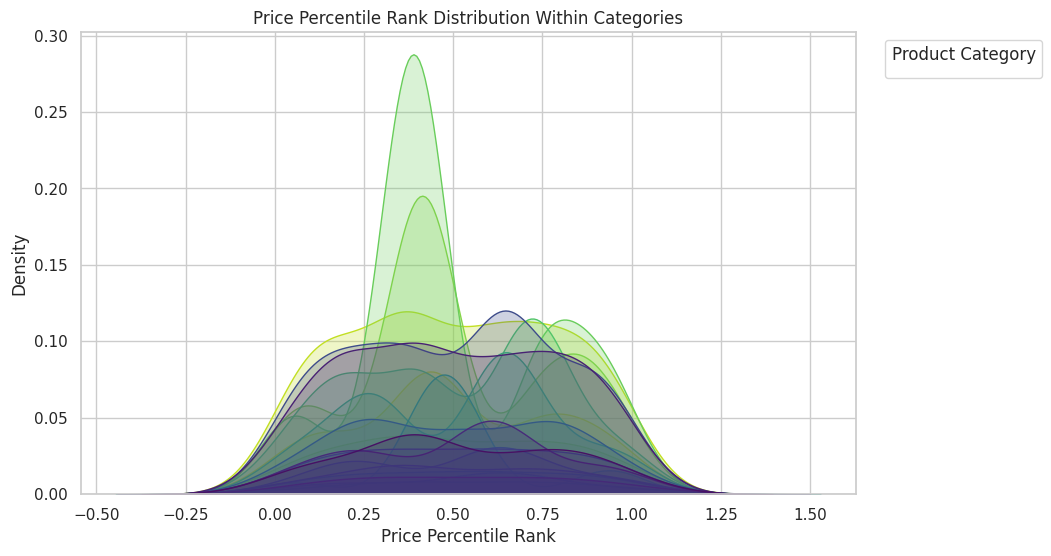

In [26]:
# Set the style of the plot
sns.set(style='whitegrid')

# A density plot for price percentile ranks within categories
plt.figure(figsize=(10, 6))
sns.kdeplot(data=men_data, x='price_percentile_rank', hue='product_category', fill=True, palette='viridis')
plt.title('Price Percentile Rank Distribution Within Categories')
plt.xlabel('Price Percentile Rank')
plt.ylabel('Density')

plt.legend(title='Product Category', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


This visualization allows for a comparison of how products within various categories are priced relative to their category peers. It helps identify which categories have products with higher or lower price percentile ranks, offering insights into price competitiveness and distribution within the dataset.

In [27]:
women_Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_category  2707 non-null   object
 1   Unnamed: 0        2707 non-null   int64 
 2   Product_Name      2704 non-null   object
 3   Link              2707 non-null   object
 4   Product_Image     2707 non-null   object
 5   Price             2707 non-null   object
 6   Details           2707 non-null   object
dtypes: int64(1), object(6)
memory usage: 148.2+ KB


In [28]:
women_Combined_df.isnull().sum()

product_category    0
Unnamed: 0          0
Product_Name        3
Link                0
Product_Image       0
Price               0
Details             0
dtype: int64

In [29]:
women_Combined_df.describe()

,Unnamed: 0
count,2707.000000
mean,185.723679
std,184.129551
min,0.000000
25%,48.000000
50%,114.000000
75%,277.500000
max,802.000000


In [30]:
women_Combined_df['Product_Name'].fillna(method='ffill', inplace=True)  # Forward fill for 'product_name'


In [31]:
# Remove the Rupee sign and any other non-numeric characters from the 'price' column
women_Combined_df['Price'] = women_Combined_df['Price'].str.replace('₹', '').str.replace(',', '')

# Convert the 'price' column to numeric, coercing any non-numeric values to NaN
women_Combined_df['Price'] = pd.to_numeric(women_Combined_df['Price'], errors='coerce')


In [32]:
# drop uneccesary columns or the columns which are not useful
women_data = women_Combined_df.copy()
women_data = women_data.drop(columns=['Unnamed: 0', 'Link', 'Product_Image'])
women_data

,product_category,Product_Name,Price,Details
0,BAGS,FABRIC BELT BAG,2590.0,Fabric belt bag. Adjustable strap. Front zip p...
1,BAGS,FABRIC CROSSBODY BAG,2890.0,Fabric crossbody bag. Adjustable fabric crossb...
2,BAGS,FABRIC CROSSBODY BAG,2590.0,Fabric crossbody bag. Adjustable fabric crossb...
3,BAGS,CROSSBODY PURSE,2290.0,Crossbody bag that converts into a clutch. Int...
4,BAGS,CROSSBODY BAG,2890.0,Crossbody bag with adjustable strap. Lining. Z...
...,...,...,...,...
2702,WAISTCOATS_GILETS,WAISTCOAT WITH REAR TAB,2990.0,V-neck waistcoat. Tab at the back. Button-up f...
2703,WAISTCOATS_GILETS,WAISTCOAT WITH CONTRAST EMBROIDERY,4990.0,Waistcoat made of 100% cotton. Round neck. Con...
2704,WAISTCOATS_GILETS,WAISTCOAT WITH CONTRAST EMBROIDERY,4990.0,Open waistcoat with a round neck. Contrast emb...
2705,WAISTCOATS_GILETS,TIE-DYE PRINT VEST,3990.0,Cropped waistcoat featuring bead appliqués and...


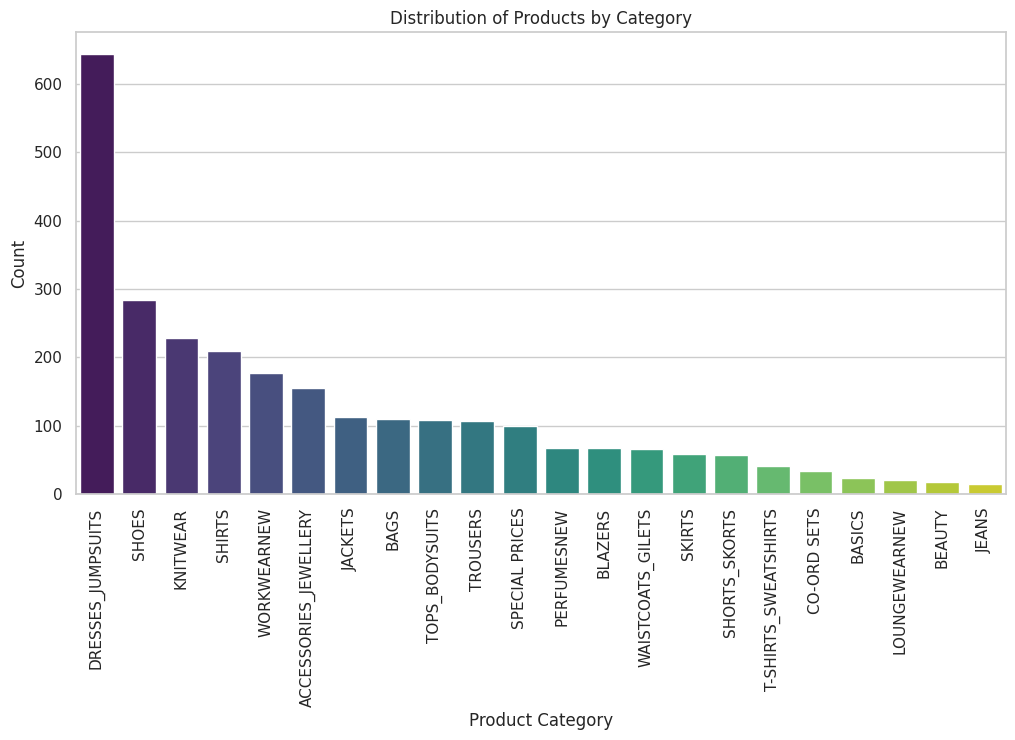

In [33]:
# Count the number of products in each category
category_counts = women_data['product_category'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Products by Category')
plt.show()

There are 21 categories in product. Dresses Jumpsuits are available in higher range followed by Shoes, Knitwear, etc.



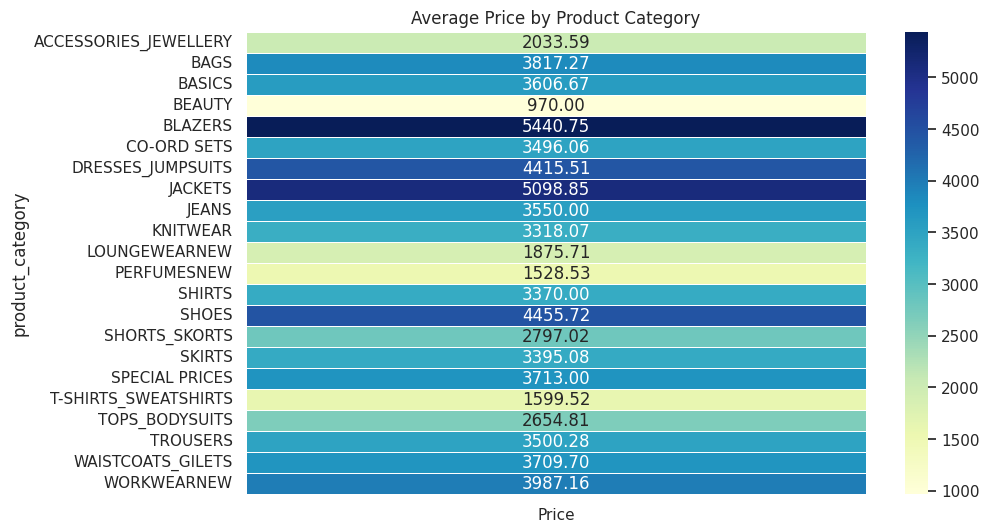

In [34]:
# Create a pivot table to analyze relationships between product categories and prices
pivot_table = women_data.pivot_table(index='product_category', values='Price', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price by Product Category')
plt.show()


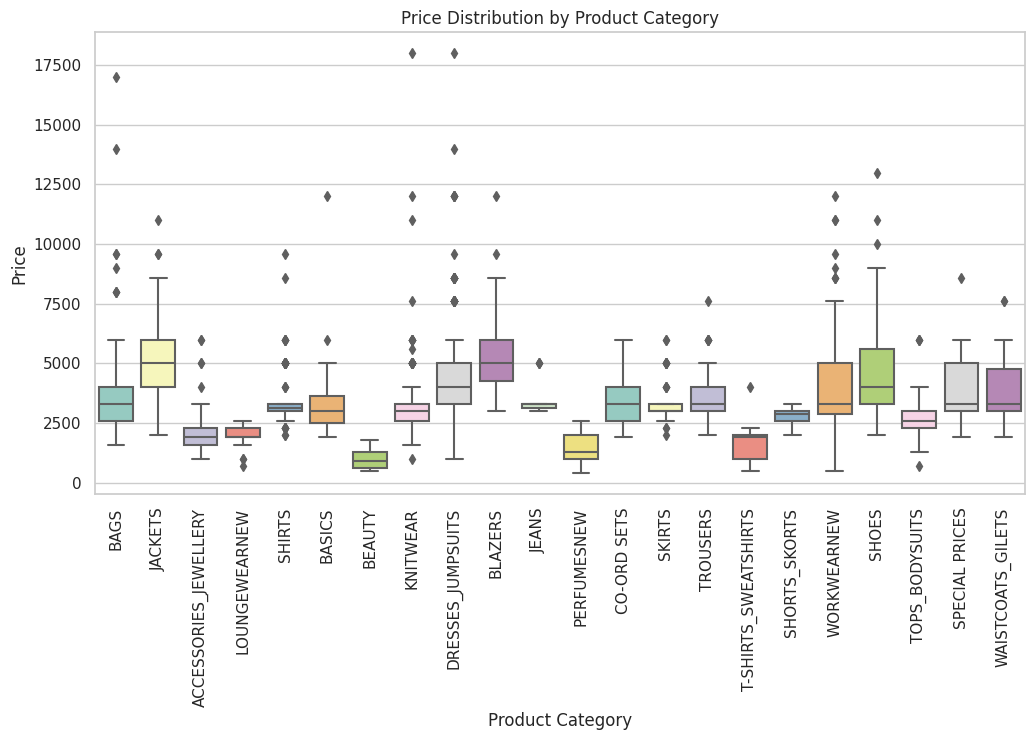

In [35]:
# Create a box plot or violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='Price', data=women_data, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Price Distribution by Product Category')
plt.show()


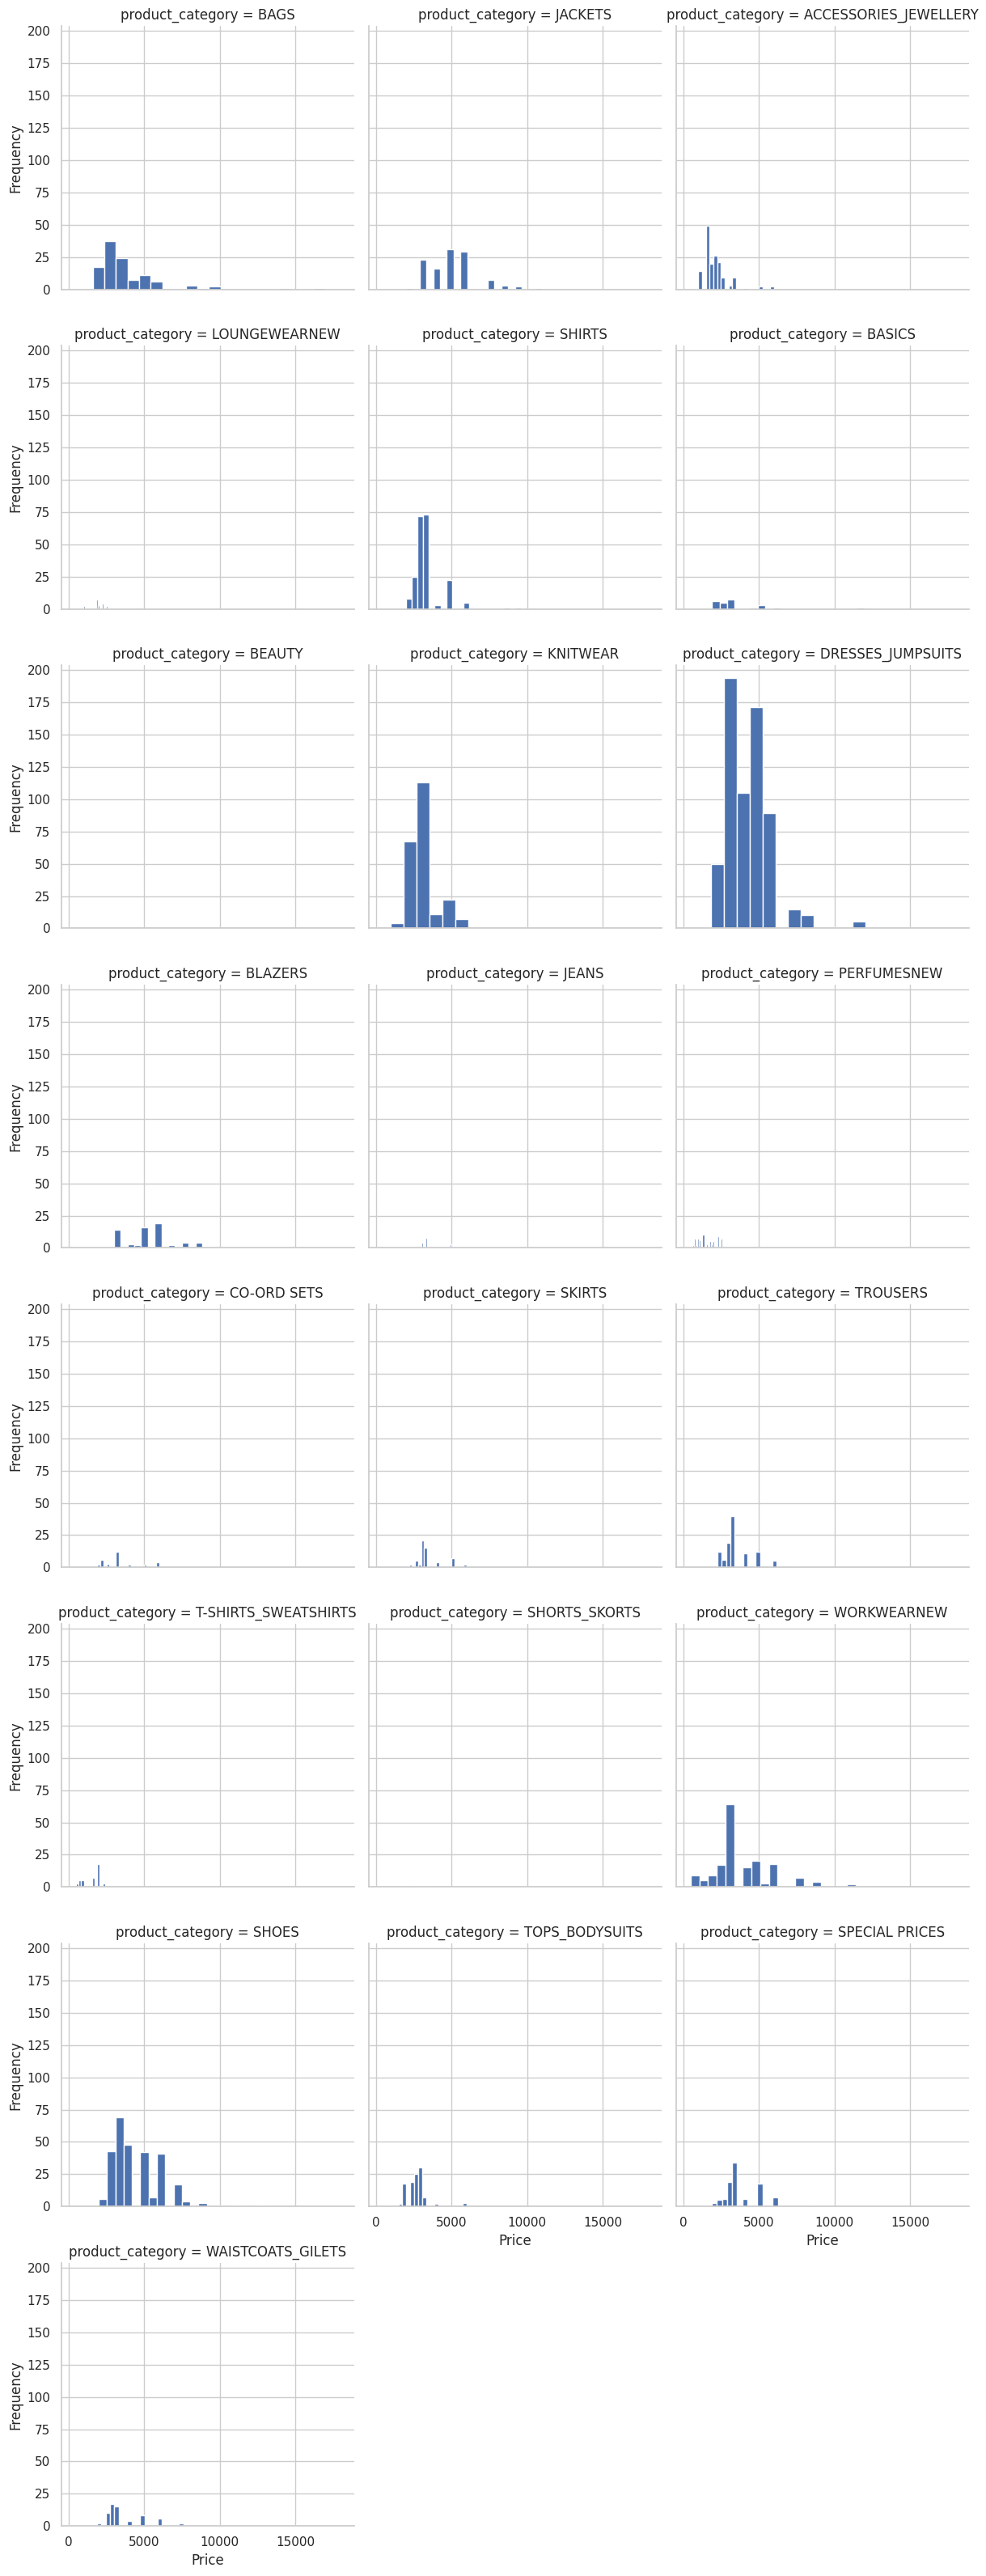

In [36]:
# Create histograms for prices by product category
g = sns.FacetGrid(women_data, col='product_category', col_wrap=3, height=4, margin_titles=True)
g.map(plt.hist, 'Price', bins=20)
g.set_axis_labels('Price', 'Frequency')
plt.show()

This series of histograms displays the distribution of product prices within various product categories. Each histogram represents a specific category, with prices on the x-axis and the frequency of products at different price points on the y-axis. The histograms allow us to observe how prices are distributed within each category, providing valuable insights into the pricing strategies and price ranges for different types of products.

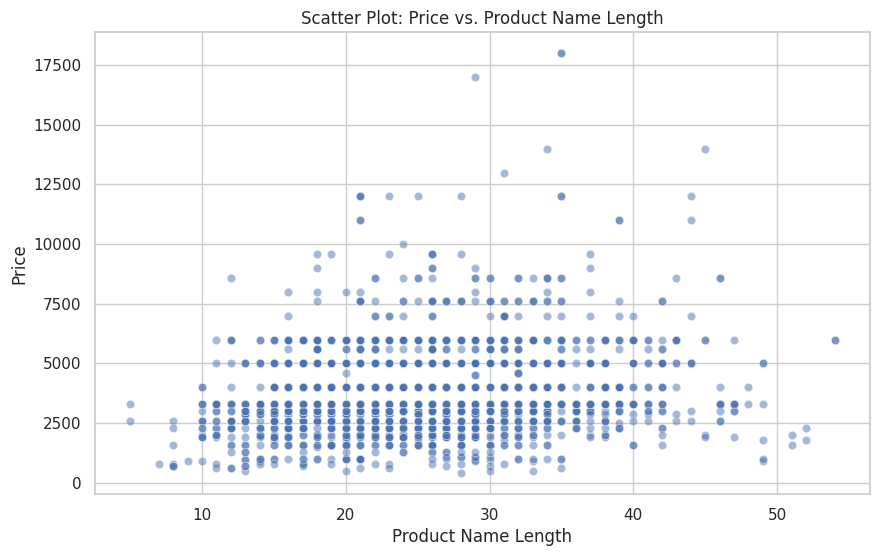

In [37]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=women_data['Product_Name'].str.len(), y='Price', data=women_data, alpha=0.5)
plt.xlabel('Product Name Length')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs. Product Name Length')
plt.show()


This scatter plot illustrates the potential relationship between the length of product names and their corresponding prices. Each data point represents a product, with the x-axis indicating the length of the product name (in characters) and the y-axis representing the price.

In [38]:
beauty_products = women_data[women_data['product_category'] == 'BEAUTY']
beauty_products

,product_category,Product_Name,Price,Details
634,BEAUTY,3-IN-1 BAR REFILL,1290.0,"Creamy texture multifunction makeup bar, avail..."
635,BEAUTY,LIP OIL,790.0,This creamy lip oil glides like silk to achiev...
636,BEAUTY,ULTIMATTE MATTE LIQUID LIPSTICK,790.0,"Slick with it. Our favourite lipstick, now in ..."
637,BEAUTY,FACE BRUSH #3,950.0,Small face brush for the application of powder...
638,BEAUTY,FACE BRUSH #2,1290.0,Designed to apply powder and cream products. P...
639,BEAUTY,KABUKI BRUSH,1290.0,"Short and smooth dense-bristle brush, ideal fo..."
640,BEAUTY,EYELASH CURLER,890.0,Allows the eyelashes to be curled and raised i...
641,BEAUTY,EYE BRUSH #2,590.0,Compact and flat eye brush specially designed ...
642,BEAUTY,EYE BRUSH #1,590.0,Small eye brush designed to blend or apply eye...
643,BEAUTY,MAKEUP SPONGE,490.0,Makeup sponge specially designed for liquid an...


In [39]:
women_data['Price'].value_counts()

3290.0     589
4990.0     389
2990.0     341
3990.0     237
2590.0     209
5990.0     207
2290.0     153
1990.0      84
1890.0      76
1590.0      72
2890.0      67
5590.0      51
7590.0      37
990.0       32
8590.0      22
6990.0      20
1290.0      15
790.0       13
11990.0      9
690.0        8
9590.0       8
7990.0       7
590.0        6
890.0        6
1790.0       6
1090.0       6
10990.0      5
8990.0       5
4590.0       4
490.0        4
950.0        3
17990.0      2
4490.0       2
13990.0      2
16990.0      1
390.0        1
1490.0       1
2490.0       1
12990.0      1
9990.0       1
Name: Price, dtype: int64

In [40]:
# Feature engineering for Price
women_data['log_price'] = women_data['Price'].apply(lambda x: np.log(x))
women_data['price_category'] = pd.cut(women_data['Price'], bins=[0, 1000, 2000, 3000, float('inf')], labels=['low', 'medium', 'high', 'very_high'])

In [41]:
women_data.head()

,product_category,Product_Name,Price,Details,log_price,price_category
0,BAGS,FABRIC BELT BAG,2590.0,Fabric belt bag. Adjustable strap. Front zip p...,7.859413,high
1,BAGS,FABRIC CROSSBODY BAG,2890.0,Fabric crossbody bag. Adjustable fabric crossb...,7.969012,high
2,BAGS,FABRIC CROSSBODY BAG,2590.0,Fabric crossbody bag. Adjustable fabric crossb...,7.859413,high
3,BAGS,CROSSBODY PURSE,2290.0,Crossbody bag that converts into a clutch. Int...,7.736307,high
4,BAGS,CROSSBODY BAG,2890.0,Crossbody bag with adjustable strap. Lining. Z...,7.969012,high


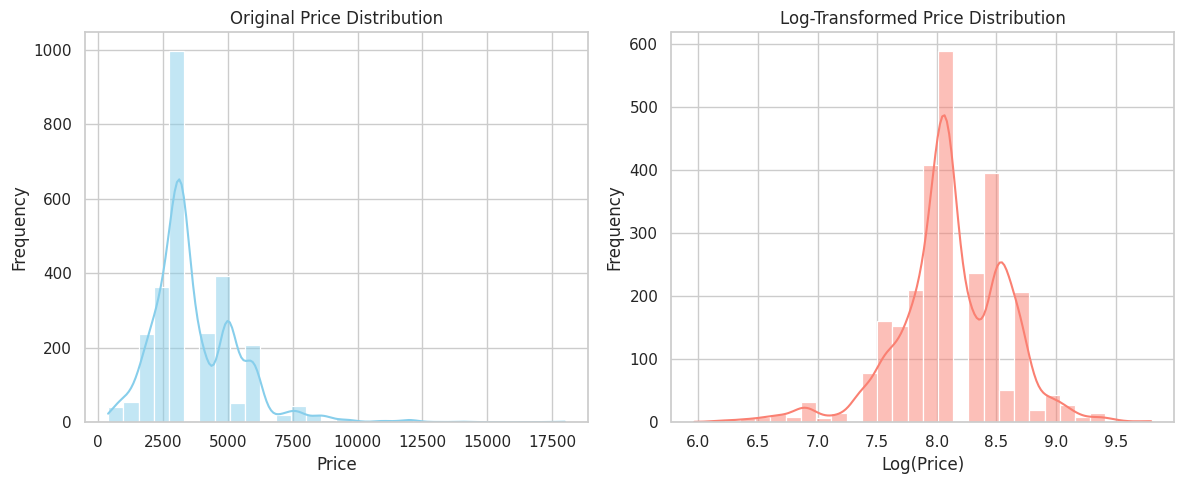

In [42]:
# Set up the figure and subplots
plt.figure(figsize=(12, 5))
plt.subplots_adjust(wspace=0.3)

# Original Price Distribution
plt.subplot(1, 2, 1)
sns.histplot(women_data['Price'], bins=30, kde=True, color='skyblue')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Log-Transformed Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(women_data['log_price'], bins=30, kde=True, color='salmon')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Left Subplot - Original Price Distribution:
The left subplot displays the original distribution of product prices. It shows the frequency of products at different price points, with a density curve overlaid for a smooth representation of the distribution. This histogram allows us to understand the distribution of prices in their original scale.

Right Subplot - Log-Transformed Price Distribution:
The right subplot illustrates the distribution of log-transformed prices. The logarithmic transformation is applied to the prices, resulting in a more symmetrical distribution. The density curve shows how prices are distributed when transformed using the logarithmic function.

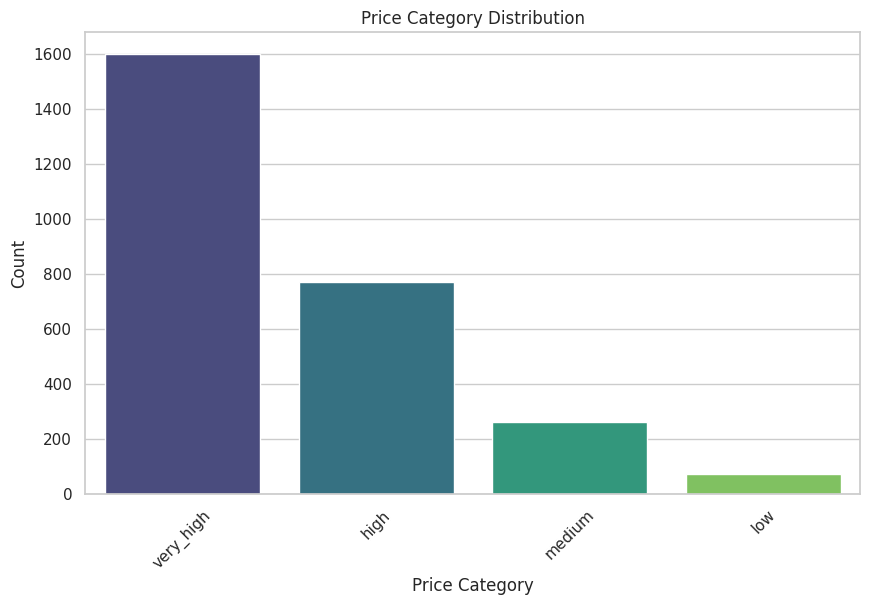

In [43]:
# Count the number of products in each price category
price_category_counts = women_data['price_category'].value_counts()

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar chart or countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=women_data, x='price_category', order=price_category_counts.index, palette='viridis')
plt.title('Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

plt.show()


The visualization represents the distribution of products across different price categories. Each bar in the chart corresponds to a price category ('low', 'medium', 'high', 'very_high'), and the height of the bar indicates the count of products within that category. This visualization helps us quickly understand how products are distributed across price ranges in the women's category.

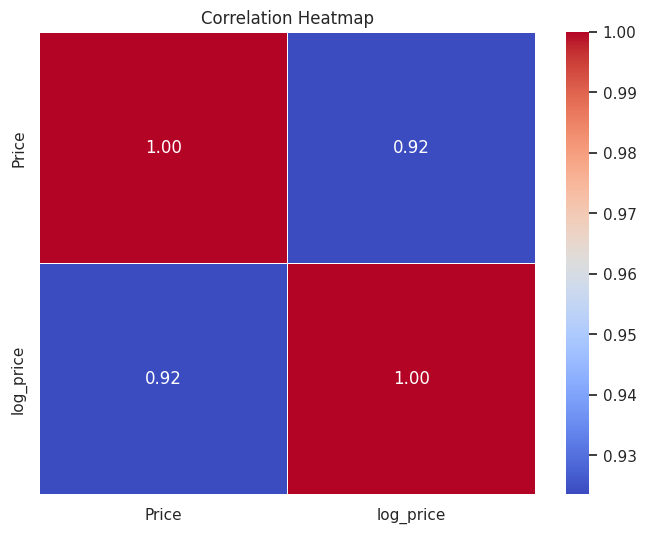

In [44]:
# Calculate the correlation matrix
correlation_matrix = women_data[['Price', 'log_price']].corr()

# Set up the figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient between 'price' and itself is 1.00, indicating a perfect positive correlation.
The correlation coefficient between 'log_price' and itself is 1.00 as well, demonstrating a perfect positive correlation.
Specifically:

The correlation coefficient between 'price' and 'log_price' is approximately 0.92, signifying a strong positive correlation.

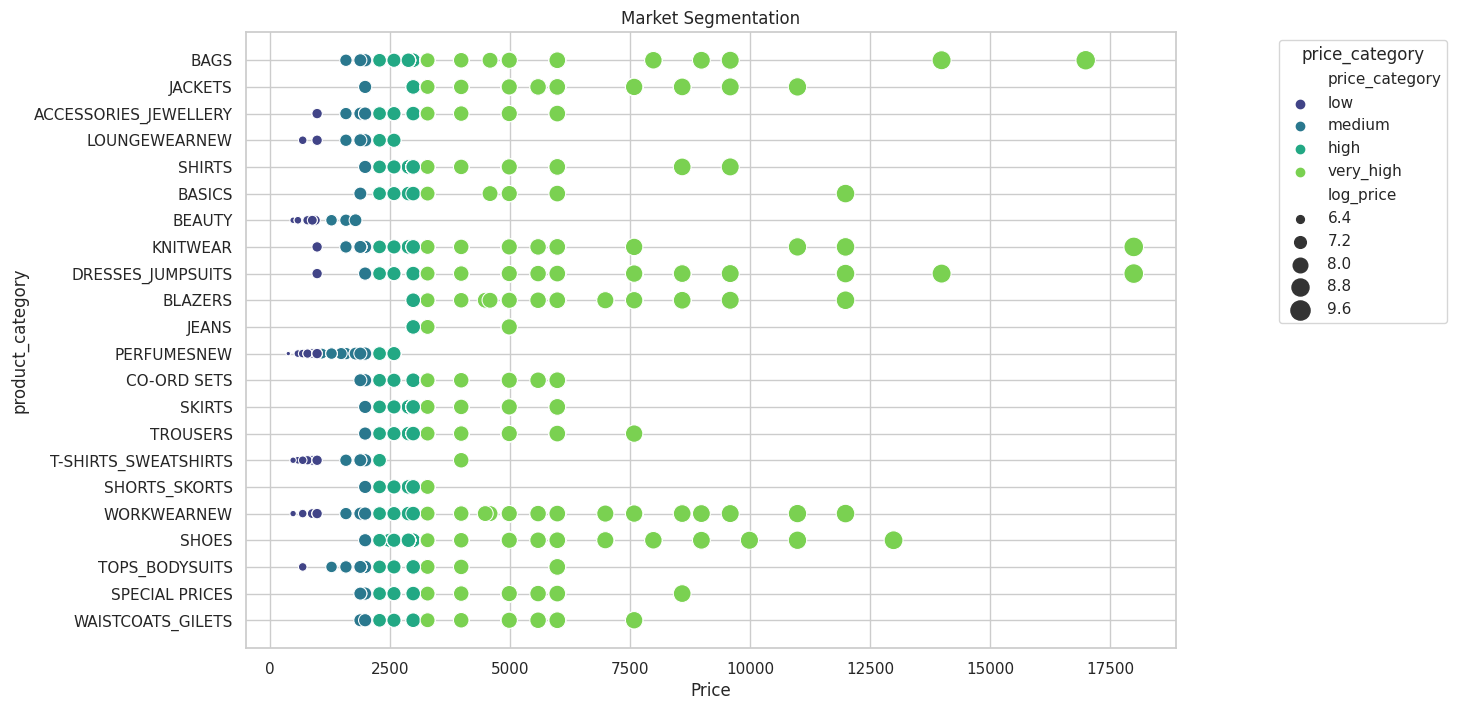

In [45]:
# Define the features for market segmentation
Price = 'Price'  # The feature for x-axis
product_category = 'product_category'   # The feature for y-axis
log_price = 'log_price'  # The feature for bubble size
price_category = 'price_category'  # the feature for bubble color

# Create a scatter plot with bubble size and color
plt.figure(figsize=(12, 8))
sns.scatterplot(data=women_data, x= Price , y=product_category, size=log_price, hue=price_category, palette='viridis', sizes=(10, 200))

# Labels and a legend
plt.title('Market Segmentation')
plt.xlabel(Price)
plt.ylabel(product_category)
plt.legend(title=price_category, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

X-Axis (Price): The x-axis represents the product price, allowing us to analyze how prices are distributed across different product categories.

Y-Axis (Product Category): The y-axis displays product categories, helping us understand which categories products belong to.

Bubble Size (Log-Transformed Price): The size of each bubble indicates the log-transformed price of a product. Larger bubbles represent higher log-transformed prices, while smaller bubbles represent lower log-transformed prices.

Bubble Color (Price Category): The color of each bubble corresponds to its price category. Different colors represent different price categories, helping us segment products based on their price ranges.

In [46]:
women_data['price_percentile_rank'] = women_data.groupby('product_category')['Price'].rank(pct=True)


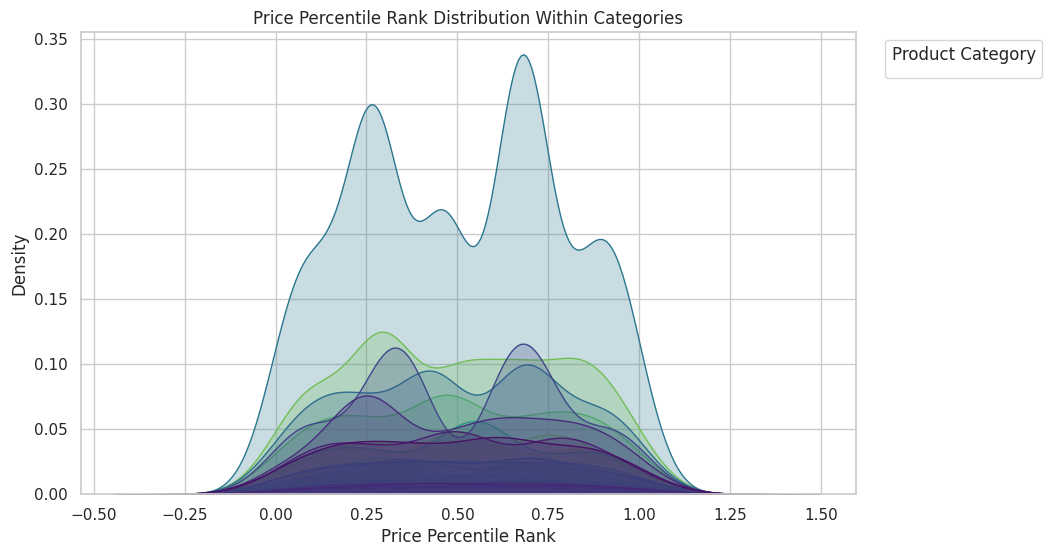

In [47]:
# Set the style of the plot
sns.set(style='whitegrid')

# A density plot for price percentile ranks within categories
plt.figure(figsize=(10, 6))
sns.kdeplot(data=women_data, x='price_percentile_rank', hue='product_category', fill=True, palette='viridis')
plt.title('Price Percentile Rank Distribution Within Categories')
plt.xlabel('Price Percentile Rank')
plt.ylabel('Density')

plt.legend(title='Product Category', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

This visualization allows for a comparison of how products within various categories are priced relative to their category peers. It helps identify which categories have products with higher or lower price percentile ranks, offering insights into price competitiveness and distribution within the dataset.